In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2023-04-17 16:40:13.603315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 16:40:18.585545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-17 16:40:18.585584: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-17 16:40:27.102499: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [7]:
(x_train, y_train), (x_test,y_test)  = keras.datasets.mnist.load_data()
x_train = x_train /255
x_test = x_test /255 


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(392,activation='relu'),
    keras.layers.Dense(196,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tensor_call = keras.callbacks.TensorBoard(log_dir="./logs",histogram_freq=1)

In [30]:
model.fit(x_train,y_train,epochs=15,callbacks=[tensor_call])

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1901 - accuracy: 0.9425
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0789 - accuracy: 0.9762
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0564 - accuracy: 0.9821
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0403 - accuracy: 0.9868
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - loss:

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9792


[0.0900183841586113, 0.979200005531311]

In [13]:
pre= model.predict(x_train)


2023-04-17 16:44:16.868151: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 960us/step


In [22]:
y_pre = [np.argmax(i) for i in model.predict(x_test)]

313/313 [==============================] - 0s 1ms/step


In [23]:

cm =  tf.math.confusion_matrix(labels=y_test,predictions=y_pre)

<Axes: >

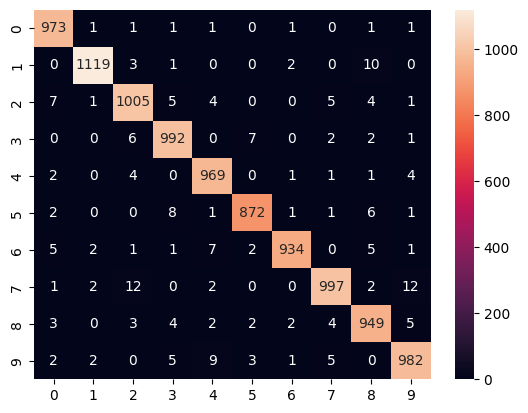

In [26]:
import seaborn as sn
sn.heatmap(cm,fmt='d',annot=True)